In [5]:
import random
import numpy as np
import pandas as pd

In [92]:
class City:
    def __init__(self, name, longitude, latitude):
      self.name = name
      self.longitude = longitude 
      self.latitude = latitude 

class TSP:
    def __init__(self, cities_list):
      self.cities_list = cities_list

    def choose_start_city(self):
      return random.choice(self.cities_list)

    def calc_euclidean_distance(self, current_city, neighbor_city):
      return ((current_city.longitude - neighbor_city.longitude)**2 + (current_city.latitude - neighbor_city.latitude)**2)**0.5

    def find_shortest_distance(self, distance_list):
      distance_list = distance_list.sort()
      return distance_list[0]

    def check_convergence(self, visited_list):
      if len(visited_list) == self.cities_list:
        return True
      else:
        return False

In [93]:
df = pd.read_csv("Data set CSV.csv")

In [94]:
df

,City,x,y
0,1,5.500000e-08,9.860000e-09
1,2,-2.887330e+01,-7.980000e-08
2,3,-7.929160e+01,-2.140330e+01
3,4,-1.465770e+01,-4.338960e+01
4,5,-6.474730e+01,2.189820e+01
5,6,-2.905850e+01,-4.321670e+01
6,7,-7.207850e+01,1.815810e-01
7,8,-3.603660e+01,-2.161350e+01
8,9,-5.048080e+01,7.374470e+00
9,10,-5.058590e+01,-2.158820e+01


In [95]:
cities_list = []
for i in range(len(df)):
  city_name = df.iloc[i, 0]
  longtitude = df.iloc[i, 1]
  latitude = df.iloc[i, 2]
  cities_list.append(City(city_name, longtitude, latitude))

In [96]:
TSP1 = TSP(cities_list)

In [97]:
start_city = TSP1.choose_start_city()
start_city.name

10

In [98]:
cities_list.remove(start_city)

In [99]:
len(cities_list)

14

In [100]:
def find_nearest_city(current_city, cities_list):
  distances = []
  cities = []
  for city in cities_list:
    if city in visited:
      continue
    else:
      dist = TSP1.calc_euclidean_distance(current_city, city)
      distances.append(dist)
      cities.append(city)
  # print(distances)
  min_index = np.argmin(np.array(distances))
  # min_city = cities[min_index]
  current_city = cities[min_index]
  # print(min_city.name)
  visited.append(current_city)
  return distances[min_index]

In [101]:
current_city = start_city
visited = []
visited.append(current_city)
sum = 0
last = []
for city in cities_list:
  min_dist = find_nearest_city(visited[-1], cities_list)
  sum += min_dist
sum += TSP1.calc_euclidean_distance(visited[-1], start_city)
visited.append(start_city)

In [102]:
sum

284.3810904080332

In [103]:
for city in visited:
  print(city.name)

10
8
6
4
11
1
13
2
15
9
5
7
3
12
14
10


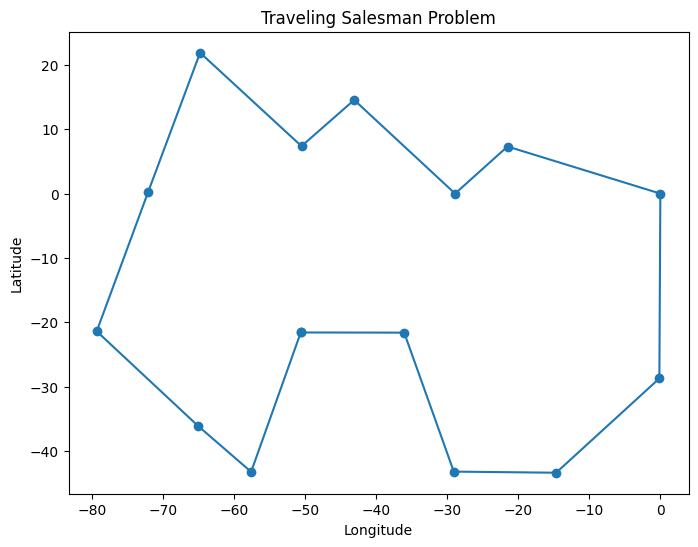

In [104]:
import matplotlib.pyplot as plt
x_coords = [city.longitude for city in visited]
y_coords = [city.latitude for city in visited]
plt.figure(figsize=(8, 6))
plt.plot(x_coords, y_coords, marker='o', linestyle='-')
plt.title('Traveling Salesman Problem')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()